In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
mean=np.array([5.0,6.0])
cov=np.array([[1.0,0.95],[0.95,1.2]])
data=np.random.multivariate_normal(mean,cov,8000)


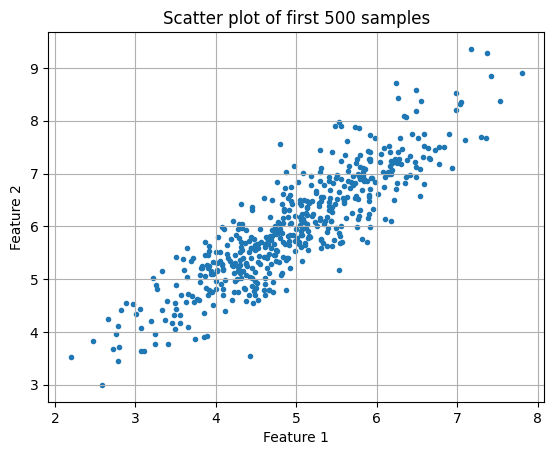

In [4]:
plt.scatter(data[:500,0],data[:500,1],marker='.')
plt.title("Scatter plot of first 500 samples")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()